To analyse the attitude of people on Anti-Semitic behaviour or activties using Linear and Polynomial Regression models

In [61]:
#We import all the necessary libraries here
import numpy as np
import pandas as pd
import matplotlib as plt
from pprint import pprint
import json
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error

Next, we load the datasets that we will be working on. We use the datasets "Perceptions on changes in the level of              antisemitism in the country over the past five years, by EU Member State                                               (%).json","Antisemitism_is_seen_to_be_a_problem_in_the_country_today_ by_EU_Member_State .json" and "reporting of the most 
serious incident of antisemitic discrimination to an authority or organisation, in 2013, by EU Member State (%).json" for 
our data analysis here. We combine all three of these datasets to apply machine learning algorithms. 

In [62]:
with open('Perceptions on changes in the level of antisemitism in the country over the past five years, by EU Member State (%).json') as json_file:
    m = json.load(json_file)

pprint(m)

{'_data': [['Country',
            'Increased a lot',
            'Increased a little',
            'Stayed the same',
            'Decreased a little',
            'Decreased a lot',
            "Don't know"],
           ['France', '74', '14', '8', '1', '3', '1'],
           ['Hungary', '70', '21', '5', '1', '3', '1'],
           ['Belgium', '58', '30', '9', '1', '1', '2'],
           ['Sweden', '37', '43', '14', '2', '1', '2'],
           ['Italy', '27', '41', '25', '6', '1', '1'],
           ['Germany', '32', '36', '23', '3', '3', '4'],
           ['Latvia', '9', '30', '44', '5', '4', '9'],
           ['United Kingdom', '27', '39', '27', '4', '1', '3'],
           ['Eight-country average', '44', '32', '18', '3', '2', '2']],
 'data': [{'data': [74, 70, 58, 37, 27, 32, 9, 27, 44],
           'name': 'Increased a lot'},
          {'data': [14, 21, 30, 43, 41, 36, 30, 39, 32],
           'name': 'Increased a little'},
          {'data': [8, 5, 9, 14, 25, 23, 44, 27, 18],
           'nam

In [63]:
with open('Antisemitism_is_seen_to_be_a_problem_in_the_country_today_ by_EU_Member_State .json') as json_file:
    l = json.load(json_file)

pprint(l)

{'_data': [['Country',
            'A very big problem',
            'A fairly big problem',
            'Not a very big problem',
            'Not a problem at all',
            "Don't know"],
           ['France', '52', '33', '11', '4', '1'],
           ['Hungary', '49', '41', '7', '3', '0'],
           ['Belgium', '35', '42', '19', '2', '2'],
           ['Sweden', '20', '40', '35', '5', '1'],
           ['Italy', '19', '41', '38', '1', '1'],
           ['Germany', '17', '44', '34', '4', '2'],
           ['Latvia', '14', '30', '47', '7', '2'],
           ['United Kingdom', '11', '37', '47', '5', '1'],
           ['Eight-country average', '28', '38', '30', '4', '1']],
 'data': [{'data': [52, 49, 35, 20, 19, 17, 14, 11, 28],
           'name': 'A very big problem'},
          {'data': [33, 41, 42, 40, 41, 44, 30, 37, 38],
           'name': 'A fairly big problem'},
          {'data': [11, 7, 19, 35, 38, 34, 47, 47, 30],
           'name': 'Not a very big problem'},
          {'data': [

In [64]:
with open('reporting of the most serious incident of antisemitic discrimination to an authority or organisation, in 2013, by EU Member State (%).json') as json_file:
    data = json.load(json_file)

pprint(data)

{'_data': [['Country', 'Yes, %', 'No, %'],
           ['United Kingdom', '24', '76'],
           ['Belgium', '22', '78'],
           ['France', '21', '79'],
           ['Germany', '18', '82'],
           ['Italy', '17', '83'],
           ['Hungary', '14', '86'],
           ['Sweden', '4', '97'],
           ['Eight-country average', '18', '82']],
 'data': [{'data': [24, 22, 21, 18, 17, 14, 4, 18], 'name': 'Yes, %'},
          {'data': [76, 78, 79, 82, 83, 86, 97, 82], 'name': 'No, %'}],
 'description': 'This chart shows the trend of reporting of the most serious '
                'incident of antisemitic discrimination to an authority or '
                'organisation, in 2013, by EU Member State (%)',
 'labels': {'name': 'Country',
            'values': ['United Kingdom',
                       'Belgium',
                       'France',
                       'Germany',
                       'Italy',
                       'Hungary',
                       'Sweden',
                

In [65]:
#We load the combined dataset here
DATAFRAME = pd.read_csv('Combined dataset.csv' , encoding = "utf8")
DATAFRAME

,Category,A very big problem,A fairly big problem,Not a very big problem,Not a problem at all,Don't know,Perception Increased a lot,Perception Increased a little,Perception Stayed the same,Perception Decreased a little,Perception Decreased a lot,Don't know.1,Reporting incidents Yes(%),Not reporting No(%)
0,France,52,33,11,4,1,9,0,0,0,0,0,21,79
1,Hungary,49,41,7,3,0,70,21,5,1,3,1,14,86
2,Belgium,35,42,19,2,2,58,30,9,1,1,2,22,78
3,Sweden,20,40,35,5,1,37,43,14,2,1,2,4,97
4,Italy,19,41,38,1,1,27,41,25,6,1,1,17,83
5,Germany,17,44,34,4,2,32,36,23,3,3,4,18,82
6,Latvia,14,30,47,7,2,9,30,44,5,4,9,0,0
7,United Kingdom,11,37,47,5,1,27,39,27,4,1,3,24,76


In [66]:
#To study if there exists a linear relationship for our chosen values, we proceed to build a linear regression model first
X = DATAFRAME.iloc[:, 1:2].values 
y = DATAFRAME.iloc[:, 6].values 


In [67]:
# Fitting Linear Regression to the dataset 
from sklearn.linear_model import LinearRegression 
lin = LinearRegression() 

lin.fit(X, y) 


LinearRegression()

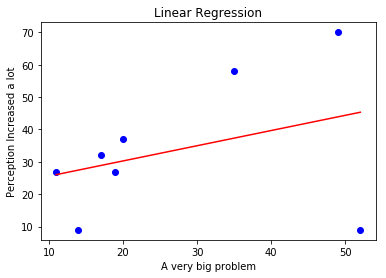

In [68]:
# Visualising the Linear Regression results 
plt.scatter(X, y, color = 'blue') 

plt.plot(X, lin.predict(X), color = 'red') 
plt.title('Linear Regression') 
plt.xlabel('A very big problem') 
plt.ylabel('Perception Increased a lot') 

plt.show() 

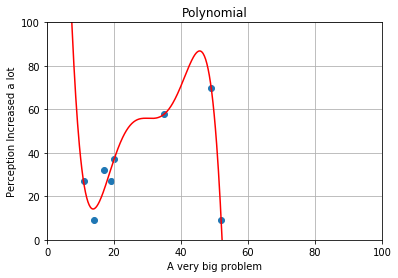

In [69]:
#Studying the relationship between anti-semitism being a very big problem and perception having increased a lot
import numpy as np
import matplotlib.pyplot as plt

Y = [9, 70, 58, 37, 27, 32, 9, 27]
X = [52, 49, 35, 20, 19, 17, 14, 11]

# Training the Algorithm (Polynomial)
degree = 5
poly_fit = np.poly1d(np.polyfit(X,Y, degree))

# Plotting the data
xx = np.linspace(0, 100, 550)
plt.plot(xx, poly_fit(xx), c='r',linestyle='-')
plt.title('Polynomial')
plt.xlabel('A very big problem')
plt.ylabel('Perception Increased a lot')
plt.axis([0, 100, 0, 100])
plt.grid(True)
plt.scatter(X, Y)
plt.show()


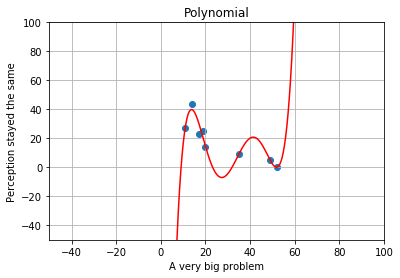

In [70]:
#Studying the relationship between perception staying the same and Anti-semitism being a very big problem.
import numpy as np
import matplotlib.pyplot as plt

Y = [0, 5, 9, 14, 25, 23, 44, 27]
X = [52, 49, 35, 20, 19, 17, 14, 11]

# Training the Algorithm (Polynomial)
degree = 5
poly_fit = np.poly1d(np.polyfit(X,Y, degree))

# Plotting the data
xx = np.linspace(0, 100, 550)
plt.plot(xx, poly_fit(xx), c='r',linestyle='-')
plt.title('Polynomial')
plt.xlabel('A very big problem')
plt.ylabel('Perception stayed the same')
plt.axis([-50, 100, -50, 100])
plt.grid(True)
plt.scatter(X, Y)
plt.show()


In [71]:
X = DATAFRAME.iloc[:, 1:2].values 
y = DATAFRAME.iloc[:, 13].values 


In [72]:
# Fitting Linear Regression to the dataset to study the linear relationship between ANti-semitism being a very big problem
# and percentage of people not reporting
from sklearn.linear_model import LinearRegression 
lin = LinearRegression() 

lin.fit(X, y) 


LinearRegression()

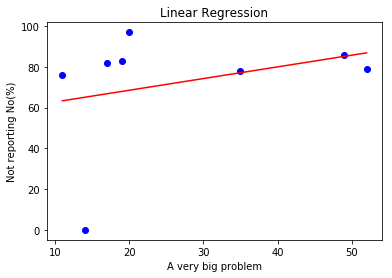

In [73]:
# Visualising the Linear Regression results 
plt.scatter(X, y, color = 'blue') 

plt.plot(X, lin.predict(X), color = 'red') 
plt.title('Linear Regression') 
plt.xlabel('A very big problem') 
plt.ylabel('Not reporting No(%)') 

plt.show() 

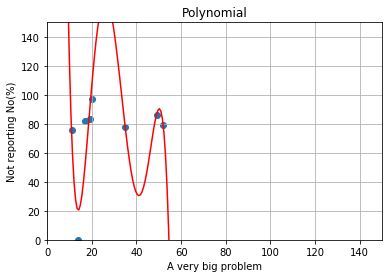

In [74]:
#we study the relationship between percentage of people refusing to report anti-semitic behaviour and Anti-semitism 
#being a very big problem
import numpy as np
import matplotlib.pyplot as plt

Y = [79, 86, 78, 97, 83, 82, 0, 76]
X = [52, 49, 35, 20, 19, 17, 14, 11]

# Training the Algorithm (Polynomial)
degree = 5
poly_fit = np.poly1d(np.polyfit(X,Y, degree))

# Plotting data
xx = np.linspace(0, 70, 100)
plt.plot(xx, poly_fit(xx), c='r',linestyle='-')
plt.title('Polynomial')
plt.xlabel('A very big problem')
plt.ylabel('Not reporting No(%)')
plt.axis([0, 150, 0, 150])
plt.grid(True)
plt.scatter(X, Y)
plt.show()


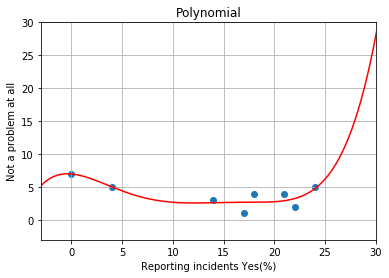

In [75]:
#We study the relationship between Anti-semitism not being a problem at all and the percentage of people reporting the incidents
import numpy as np
import matplotlib.pyplot as plt

X = [21, 14, 22, 4, 17, 18, 0, 24]
Y = [4, 3, 2, 5, 1, 4, 7, 5]

# Training the Algorithm (Polynomial)
degree = 5
poly_fit = np.poly1d(np.polyfit(X,Y, degree))

# Plotting the data
xx = np.linspace(-3, 400, 1000)
plt.plot(xx, poly_fit(xx), c='r',linestyle='-')
plt.title('Polynomial')
plt.xlabel('Reporting incidents Yes(%)')
plt.ylabel('Not a problem at all')
plt.axis([-3, 30, -3, 30])
plt.grid(True)
plt.scatter(X, Y)
plt.show()
